---
# Исследование рентабельности нефтедобычи

---


<u>**Цель проекта**</u>: Определение региона, в котором бурение новой скважины будет наиболее прибыльным.

<u>**Сферы деятельности компаний**</u>: нефтяная промышленность

<u>**Навыки и инструменты**</u>: работа с метриками, расчёт прибыли и рисков, bootstrap, визуализация в Seaborn

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 10 #закомментировать в случае возникновения проблем :)
sns.set(rc={'figure.figsize':(14,10)})

In [3]:
import warnings
warnings.simplefilter('ignore')

from tqdm.notebook import tqdm

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import (accuracy_score, r2_score, f1_score, mean_squared_error,
                             mean_absolute_error, precision_score, recall_score,
                             precision_recall_curve, confusion_matrix, roc_curve, roc_auc_score)

import joblib

In [5]:
data_1 = pd.read_csv(...)
data_2 = pd.read_csv(...)
data_3 = pd.read_csv(...)

In [6]:
print('data_1')
display(data_1)
print(data_1.info())
print(data_1.describe())
print()
print('Пропусков в data_1:', data_1.isna().sum().sum())

print()
print()
print()

print('data_2')
display(data_2)
print(data_2.info())
print(data_2.describe())
print()
print('Пропусков в data_2:', data_2.isna().sum().sum())

print()
print()
print()

print('data_3')
display(data_3)
print(data_3.info())
print(data_3.describe())
print('Пропусков в data_3:', data_3.isna().sum().sum())

data_1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

Во всех трёх датасетах **пропуски отсутствуют**.

Видно, что признаки *'f0'*, *'f1'* и *'f2'* уже **масштабированы методом стандартизации**.

В каждом наборе данных есть информация о скважинах, в которых **нефть отсутствует**.

На всякий случай проверим, сколько таких "псевдоместорождений" присутствует в каждой из выборок:

In [7]:
print('Регион 1:', data_1.query('product == 0')['product'].count())
print('Регион 2:', data_2.query('product == 0')['product'].count())
print('Регион 3:', data_3.query('product == 0')['product'].count())

Регион 1: 1
Регион 2: 8235
Регион 3: 1


В первом и третьем регионах всё нормально, а **во втором регионе 8,235% месторождений не содержат нефти.**

Оставим данные о "псевдоместорождениях" в покое — они являются ценными, и **исключать из выборки их нельзя**.

Разделим каждую из выборок на обучающую и валидационную подвыборки в соотношении 75:25, проверим получившееся соотношение:

In [8]:
target_1 = data_1['product']
features_1 = data_1.drop(['product'], axis=1).drop(['id'], axis=1)

target_2 = data_2['product']
features_2 = data_2.drop(['product'], axis=1).drop(['id'], axis=1)

target_3 = data_3['product']
features_3 = data_3.drop(['product'], axis=1).drop(['id'], axis=1)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1,
                                                                                      target_1,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

print('{: <30}{: >5.0%}'.format('Доля обучающей выборки 1:', len(features_train_1)/len(data_1)))
print('{: <30}{: >5.0%}'.format('Доля валидационной выборки 1:', len(features_valid_1)/len(data_1)))

print()

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2,
                                                                                      target_2,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

print('{: <30}{: >5.0%}'.format('Доля обучающей выборки 2:', len(features_train_2)/len(data_2)))
print('{: <30}{: >5.0%}'.format('Доля валидационной выборки 2:', len(features_valid_2)/len(data_2)))

print()

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3,
                                                                                      target_3,
                                                                                      test_size=0.25,
                                                                                      random_state=12345)

print('{: <30}{: >5.0%}'.format('Доля обучающей выборки 3:', len(features_train_3)/len(data_3)))
print('{: <30}{: >5.0%}'.format('Доля валидационной выборки 3:', len(features_valid_3)/len(data_3)))

Доля обучающей выборки 1:       75%
Доля валидационной выборки 1:   25%

Доля обучающей выборки 2:       75%
Доля валидационной выборки 2:   25%

Доля обучающей выборки 3:       75%
Доля валидационной выборки 3:   25%


<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Выводы: </h3>
    <ul>
        <li><b>Загружен датасет, получена общая информация</b>;</li>
        <li><b>Признаки f0, f1 и f2 изначально получены в масштабированном виде, пропуски отсутствуют</b>;</li>
        <li><b>Обнаружено большое количество данных о месторождениях во втором регионе, не содержащих нефти. Принято решение использовать все предоставленные данные</b>;</li>
        <li><b>Произведено разделение каждой из трёх из выборок на обучающую и валидационную подвыборки в соотношении 75:25</b>.</li>
    </ul>
</div>

# 2. Обучение и проверка модели

Для расчёта среднего запаса предсказанного сырья и RMSE создадим функцию ***score_model***, в качестве модели будем использовать **линейную регрессию**:

In [9]:
def score_model(features_train, target_train, features_valid, target_valid):
    
    predictions = (LinearRegression(n_jobs=-1)
                   .fit(features_train, target_train)
                   .predict(features_valid))
    rmse = mean_squared_error(predictions, target_valid)**0.5
    
    return predictions, rmse

In [10]:
predictions_1, rmse_1 = score_model(features_train_1, target_train_1, features_valid_1, target_valid_1)
print('Регион 1:')
print('Средний запас предсказанного сырья: {:.2f} тыс. баррелей'.format(predictions_1.mean()))
print('RMSE: {:.2f}'.format(rmse_1))
print()

predictions_2, rmse_2 = score_model(features_train_2, target_train_2, features_valid_2, target_valid_2)
print('Регион 2:')
print('Средний запас предсказанного сырья: {:.2f} тыс. баррелей'.format(predictions_2.mean()))
print('RMSE: {:.2f}'.format(rmse_2))
print()

predictions_3, rmse_3 = score_model(features_train_3, target_train_3, features_valid_3, target_valid_3)
print('Регион 3:')
print('Средний запас предсказанного сырья: {:.2f} тыс. баррелей'.format(predictions_3.mean()))
print('RMSE: {:.2f}'.format(rmse_3))
print()

Регион 1:
Средний запас предсказанного сырья: 92.59 тыс. баррелей
RMSE: 37.58

Регион 2:
Средний запас предсказанного сырья: 68.73 тыс. баррелей
RMSE: 0.89

Регион 3:
Средний запас предсказанного сырья: 94.97 тыс. баррелей
RMSE: 40.03



<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Выводы: </h3>
    <ul>
        <li><b>В качестве модели использована линейная регрессия</b>;</li>
        <li><b>Обучены модели на данных из каждого региона, получены предсказания</b>;</li>
        <li><b>Произведено вычисление среднего запаса предсказанного сырья и среднеквадратичных ошибок</b>.</li>
    </ul>
</div>

# 3. Подготовка к расчёту прибыли

- `При разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.`

- `Бюджет на разработку скважин в регионе — 10 млрд рублей.`

- `Один баррель сырья приносит 450 рублей дохода.`

- `Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.`

- `После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.`

- `Среди них выбирают регион с наибольшей средней прибылью.`

**Сохраним константы**, полученные из условия, вычислим пороговое значение, при котором разработка нового месторождения не будет убыточной:

In [11]:
OILFIELD_SAMPLE = 500
OILFIELD_SAMPLE_BEST = 200
EXPLOITATION_BUDGET = 10000000000
OIL_UNIT_COST = 450000
LOSSES_PROBABILITY_THRESHOLD = 0.025

breakeven_exploitation_threshold = EXPLOITATION_BUDGET/OILFIELD_SAMPLE_BEST/OIL_UNIT_COST

In [12]:
print('Достаточный объём сырья для безубыточной разработки новой скважины: {:.0f} тыс. баррелей'
     .format(np.ceil(breakeven_exploitation_threshold)))

Достаточный объём сырья для безубыточной разработки новой скважины: 112 тыс. баррелей


Видно, что полученное **пороговое значение объёмов сырья, при котором разработка скважины не будет убыточной, значительно больше любого из средних значений запасов сырья в каждом из трёх регионов**.

Цифры подтверждают очевидный факт: **далеко не каждое месторождение потенциально может принести прибыль**.

# 4. Расчёт прибыли и рисков 

In [13]:
def select_oilfields(data):
    data_sample = (data
                   .sample(OILFIELD_SAMPLE)
                   .sort_values(by='product_predicted', ascending=False)
                   .head(OILFIELD_SAMPLE_BEST))
    return data_sample

def estimate_profit(oil_supplies):
    profit = oil_supplies['product'].sum()*OIL_UNIT_COST - EXPLOITATION_BUDGET
    return np.float64(profit)

In [14]:
data_profit_1 = features_valid_1
data_profit_1['number'] = range(0, 25000)
data_profit_1['product'] = target_valid_1
data_profit_1['product_predicted'] = predictions_1
data_profit_1 = data_profit_1[['number', 'f0', 'f1', 'f2', 'product_predicted', 'product']]

data_profit_2 = features_valid_2
data_profit_2['number'] = range(0, 25000)
data_profit_2['product'] = target_valid_2
data_profit_2['product_predicted'] = predictions_2
data_profit_2 = data_profit_2[['number', 'f0', 'f1', 'f2', 'product_predicted', 'product']]

data_profit_3 = features_valid_3
data_profit_3['number'] = range(0, 25000)
data_profit_3['product'] = target_valid_3
data_profit_3['product_predicted'] = predictions_3
data_profit_3 = data_profit_3[['number', 'f0', 'f1', 'f2', 'product_predicted', 'product']]

In [15]:
estimate_profit(select_oilfields(data_profit_1))

256330509.3543129

In [16]:
data_profit = [[1, estimate_profit(select_oilfields(data_profit_1))],
               [2, estimate_profit(select_oilfields(data_profit_2))],
               [3, estimate_profit(select_oilfields(data_profit_3))]]

profits = pd.DataFrame(data = data_profit, columns=['region', 'profit'])

display(profits)

,region,profit
0,1,2.564668e+08
1,2,2.522741e+08
2,3,2.593132e+08


Применим Bootstrap:

Регион 1:


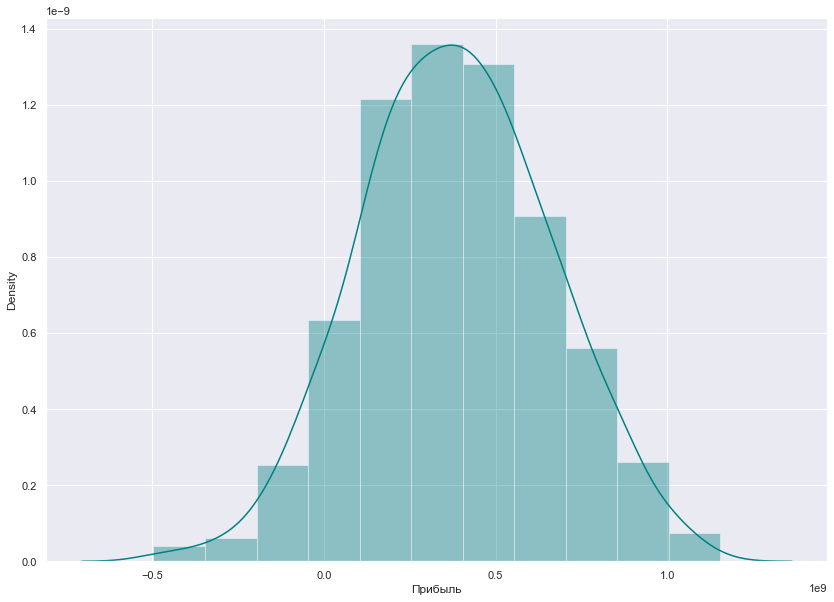

Средняя прибыль: 384260328.78 руб.
95%-ый доверительный интервал: (367080235.8510536, 401440421.7114582)
Риск убытков: 8.3%



Регион 2:


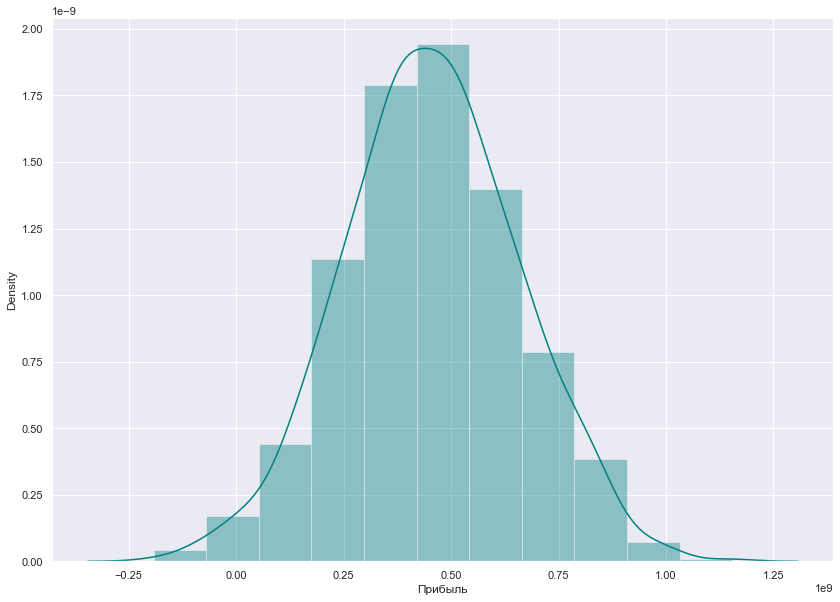

Средняя прибыль: 455016071.75 руб.
95%-ый доверительный интервал: (442410046.76319754, 467622096.7308676)
Риск убытков: 1.5%



Регион 3:


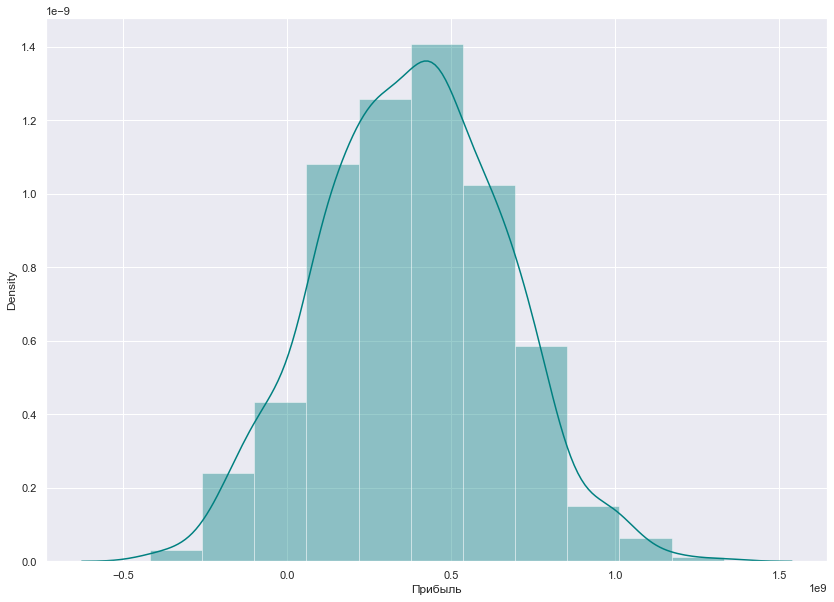

Средняя прибыль: 380893248.28 руб.
95%-ый доверительный интервал: (363791809.8246211, 397994686.73901)
Риск убытков: 9.0%





In [17]:
state = np.random.RandomState(12345)

bootstrap_values_1 = []
bootstrap_values_2 = []
bootstrap_values_3 = []

bins = np.int64(np.ceil(1 + m.log2(1000)))


for i in range(1000):
    
    data_subsample_1 = data_profit_1.sample(n=500, replace=True, random_state=state)
    bootstrap_values_1.append(estimate_profit(select_oilfields(data_subsample_1)))
    
    data_subsample_2 = data_profit_2.sample(n=500, replace=True, random_state=state)
    bootstrap_values_2.append(estimate_profit(select_oilfields(data_subsample_2)))
    
    data_subsample_3 = data_profit_3.sample(n=500, replace=True, random_state=state)
    bootstrap_values_3.append(estimate_profit(select_oilfields(data_subsample_3)))
    

bootstrap_values_1 = pd.Series(bootstrap_values_1)
bootstrap_values_2 = pd.Series(bootstrap_values_2)
bootstrap_values_3 = pd.Series(bootstrap_values_3)


confidence_interval_1 = st.t.interval(alpha=0.95,
                                    df=len(bootstrap_values_1),
                                    loc=bootstrap_values_1.mean(),
                                    scale=bootstrap_values_1.sem())
confidence_interval_2 = st.t.interval(alpha=0.95,
                                    df=len(bootstrap_values_2),
                                    loc=bootstrap_values_2.mean(),
                                    scale=bootstrap_values_2.sem())
confidence_interval_3 = st.t.interval(alpha=0.95,
                                    df=len(bootstrap_values_3),
                                    loc=bootstrap_values_3.mean(),
                                    scale=bootstrap_values_3.sem())


profit_mean_1 = bootstrap_values_1.mean()
profit_mean_2 = bootstrap_values_2.mean()
profit_mean_3 = bootstrap_values_3.mean()


losses_risk_1 = (bootstrap_values_1 < 0).mean()
losses_risk_2 = (bootstrap_values_2 < 0).mean()
losses_risk_3 = (bootstrap_values_3 < 0).mean()


print('Регион 1:')
sns.distplot(bootstrap_values_1,
             bins=bins,
             kde=True,
             color="teal",
             norm_hist=True,
             axlabel='Прибыль')
plt.show()
print('Средняя прибыль: {:.2f} руб.'.format(profit_mean_1))
print("95%-ый доверительный интервал:", confidence_interval_1)
print('Риск убытков: {:.1%}'.format(losses_risk_1))
print()
print()
print()
    

print('Регион 2:')
sns.distplot(bootstrap_values_2,
             bins=bins,
             kde=True,
             color="teal",
             norm_hist=True,
             axlabel='Прибыль')
plt.show()
print('Средняя прибыль: {:.2f} руб.'.format(profit_mean_2))
print("95%-ый доверительный интервал:", confidence_interval_2)
print('Риск убытков: {:.1%}'.format(losses_risk_2))
print()
print()
print()


print('Регион 3:')
sns.distplot(bootstrap_values_3,
             bins=bins,
             kde=True,
             color="teal",
             norm_hist=True,
             axlabel='Прибыль')
plt.show()
print('Средняя прибыль: {:.2f} руб.'.format(profit_mean_3))
print("95%-ый доверительный интервал:", confidence_interval_3)
print('Риск убытков: {:.1%}'.format(losses_risk_3))
print()
print()
print()


Добыча принесёт наибольшую прибыль **во втором регионе**, при этом риск убытков значительно меньше порогового — всего 1,5%.

<div style="border: solid darkcyan 3px; padding: 30px">
    <h3 style="color:black; margin-bottom:25px"> Общий вывод: </h3>
    <ul>
        <li><b>Загружен и проанализирован датасет</b>;</li>
        <li><b>Изучена природа "псевдоместорождений"</b>;</li>
        <li><b>Получены обучающие и валидационные подвыборки для каждого региона</b>;</li>
        <li><b>В качестве модели использована линейная регрессия</b>;</li>
        <li><b>Обучены модели на данных из каждого региона, предсказаны запасы сырья</b>;</li>
        <li><b>Произведено вычисление среднего запаса предсказанного сырья и среднеквадратичных ошибок</b>;</li>
        <li><b>Техникой Bootstrap найдено распределение прибыли, вычислены средние значения, найден девяностопятипроцентный доверительный интервал, произведена оценка рисков убытков</b>;</li>
        <li><b>Для разработки новых месторождений был выбран второй регион</b>.</li>
    </ul>
</div>